<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# PERFORMANCE D'UN OUVRAGE D'EXPLOITATION - ESSAIS DE PUITS

## Généralités


Un pompage d'essai est l'étude de la réponse d'un système aquifère à une sollicitation contrôlée correspondant à un soutirement ou une injection d'eau. On distingue les essais de puits (détermination de l'efficacité d'un puits de pompage et de ses paramètres) et les essais de nappe (détermination des paramètres de l'aquifère).
Objectifs:
1. déterminer la capacité du puits de pompage et son efficacité;
2. déterminer les propriétés physiques de l'aquifère;
3. examiner la composition chimique de de l'eau de gisement.

La réalisation de ce type de test nécessite a minima d'enregistrer sur un ou plusieurs ouvrages:
- le rabattement au cours du temps (la différence entre la hauteur piézométrique au repos dans l'ouvrage et la durant le pompage) au puits de pompage et éventuellement aux piézomètres d'observation;
- le débit d'exploitation au puits de pompage.

Dans le cas d'un essai de puits, seul l'ouvrage d'exploitation est étudié car on s'interesse à établir de ses caractéristiques en vue de son exploitation éventuelle et de sa future gestion.

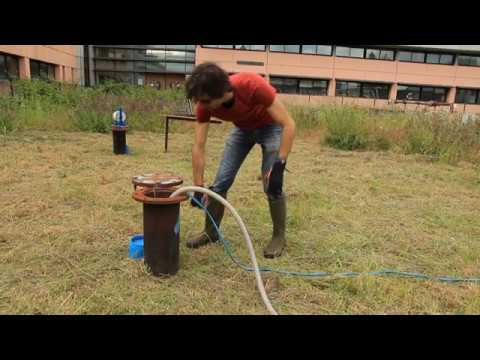

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0rRd_DqilwI')

# ESSAI DE PUITS - INTERPRETATION

L'objectif de l'essai de puits est de définir les caractéristiques de l'ouvrage afin d'être capable d'estimer son comportement hydraulique en vue d'une prochaine exploitation. En pratique, il s'agit d'être capable de déterminer le rabattement au sein de l'ouvrage pour un débit d'exploitation quelconque, et vice et versa.

Au cours d'un pompage, le rabattement mesuré au puits est constitué de deux composantes principales:
- Composante 1: fonction linéaire du débit d'exploitation. Elle est liée à la circulation du fluide au sein de l'aquifère et associée à ses caractéristiques hydrodynamiques;
$$
s_a = BQ
$$
- Composante 2: fonction puissance $n^{ieme}$ du débit d'exploitation}. Elle est liée à la circulation du fluide à l'interface puits/aquifère et à l'intérieur du puits
$$
s_w = C Q^n
$$

Le rabattement total $s$ à l'ouvrage d'exploitation peut donc s'écrire:
$$
s = s_w + s_a = BQ + CQ^n
$$

Cette équation constitue l'équation caractéristique du puits et constitue sa "carte d'identité'.


### Méthode d'interprétation


A partir des données de débit $Q_n$ pour chaque palier $n$ de valeurs croissantes et des rabattements $n$ stabilisés en fin de palier $s_n$, on calcule le rabattement spécifique $s_Q(n)$ 
$$
s_{Qn} = \frac{s_n}{Q_n}
$$

On construit la courbe expérimentale $$ s_Q = f(Q) $$.
<figure>
  <IMG SRC="paliers2.png" WIDTH=380 ALIGN="center">
</figure>

L'équation de l'ajustement optimal des points expérimentaux peut prendre trois formes:
- Pertes de charges générées par la puits négligeable, pertes de charges associées à l'aquifère fonction linéaire du débit (loi de Darcy): $$ s_Q = B \Longrightarrow s = BQ$$
- Pertes de charges générées par la puits fonction quadratique du débit (écoulement turbulent faible) plus pertes de charges associées à l'aquifère fonction linéaire du débit (loi de Darcy): $$ s_Q = B + CQ \Longrightarrow s = BQ + CQ^2 $$
- Pertes de charges générées par la puits fonction nième du débit (écoulement turbulent important) plus pertes de charges associées à l'aquifère fonction linéaire du débit (loi de Darcy): $$ s_Q = B + CQ^{m-1} \Longrightarrow s = BQ + CQ^m $$
<figure>
  <IMG SRC="paliers3.png" WIDTH=280 ALIGN="center">
</figure>   

### APPLICATION: contexte et mise en oeuvre du test

Un puits en nappe captive présente la coupe géologique suivante:
- de 0 à 10 m/sol: sables plus ou moins argileux;
- de 10 à 18 m/sol: marnes compactes à rares passées calcaires;
- de 18 à 35 m/sol: calcaire très fissuré.

Les caractéristiques techniques de l'ouvrage sont les suivantes:
- profondeur finale: 34 m/sol;
- profondeur pompe: 14 m/sol;
- top de la crépine: 20 m/sol;
- bottom de la crépine: 32 m/sol;
- profondeur du niveau statique: 4.70 m/sol. 

Un essai de puits a été réalisé sur l'ouvrage avec 4 paliers enchaînes de débits croissants:
- palier 1: durée 60 minutes, débit $Q_1 = 223.2$ m3/jour
- palier 2: durée 60 minutes, débit $Q_2 = 367.2$ m3/jour
- palier 3: durée 60 minutes, débit $Q_3 = 590.4$ m3/jour
- palier 4: durée 60 minutes, débit $Q_4 = 799.2$ m3/jour

Les données de rabattement enregistrées au puits sont fournies dans le fichier *data_well_s.csv*. Le fichier est structuré en 2 colonnes: temps (minutes) et profondeur de l'eau (m/sol)


### Question 1 - Courbe caractéristique de l'ouvrage

#### 1.a Mettre en forme les données de terrain en proposant un graphique synthétique de l'essai de puits $s = f(Q)$


La première étape est de charger les librairies classiques de Python, puis le fichier contenant les données de l'essai de puits. On peut vérifier la structure du fichier dans un éditeur de texte ou un tableur.
Pour rappel, le fichier est structuré en 2 colonnes: temps (minutes) et profondeur de l'eau (m/sol)

Il faut créer le graphique $s = f(Q)$. 

<figure>
  <IMG SRC="paliers.png" WIDTH=275 ALIGN="center">
</figure>
    
Pour cela on calcule le rabattement:
$$
s = prof(t) - niv \ stat
$$

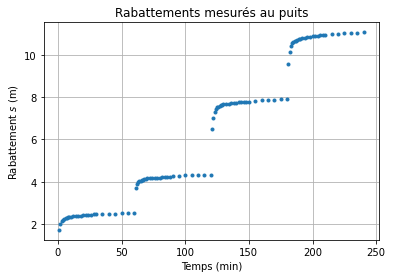

In [20]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd

#lecture fichier local
#data = np.genfromtxt('data_well_s.csv',delimiter=',')

#lecture fichier Github pour Colabotary on line
data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_paliers/main/data_well_s.csv',delimiter=',')


niv_stat = 4.70# niveau statique m/rep
t = data[:,0]
s = data[:,1]-niv_stat
#print(t)
#print(s)

plt.title('Rabattements mesurés au puits')
plt.xlabel('Temps (min)')
plt.ylabel('Rabattement $s$ (m)')
plt.grid()
plt.plot(t,s,'.')
plt.show()

Les commandes suivantes permettent d'explorer plus en détail les données expérimentales:
- nombre de mesures
- minimum
- maximum
- et c'est l'occasion de tester quelques fonctionnalités de PYTHON...

In [9]:
#nombre de mesures
nbre = len(data)

print('Au total, ', nbre,'mesures ont été réalisées')

#rabattement maximum (4eme colonne du fichier data -> index 3 pour Python)
max_columns = np.amax(data, axis=0)
max_index_col = np.argmax(data, axis=0)

print('Rabattement maximum : smax = ', max_columns[1]-niv_stat, 'mètres pour t = ',
      data[max_index_col[0],0], 'minutes')


Au total,  104 mesures ont été réalisées
Rabattement maximum : smax =  11.059999999999999 mètres pour t =  240.0 minutes


#### 1.b Construire le graphique $s_Q = f(Q)$

Afin de calculer les valeurs de rabattement spécifique, il est nécessaire d'identifier les valeurs de rabattement stabilisées pour chaque pallier. Cet examen visuel est important car il permet de s'assurer qu'aucun biais ne sera introduit par la suite dans la détermination de l'équation caractéristique.

A partir des données de débit $Q_n$ pour chaque palier $n$ de valeurs croissantes et des rabattements $n$ stabilisés en fin de palier $s_n$, on calcule le rabattement spécifique $s_Q(n)$ 
$$
s_{Qn} = \frac{s_n}{Q_n}
$$

On construit la courbe expérimentale $$ s_Q = f(Q) $$.
<figure>
  <IMG SRC="paliers2.png" WIDTH=380 ALIGN="center">
</figure>


In [12]:
#identification visuelle des valeurs stabilisées en fin de chaque palier + débits de paliers correspondant

prof_stab = np.array([7.23,9.04,12.62,15.76]) #profondeur m/repere fin de pallier
debit =np.array([223.2,367.2,590.4,799.2]) #debit stabilise fin de pallier

s_stab = prof_stab - niv_stat #rabattement fin de palier

s_q = s_stab / debit #rabattement specifique par palier

Essai par paliers - Données
Palier Débit (m3/j) Rabattement s (m) Rab. spé. s/q
    1.000   223.200     1.730 1.134e-02
    2.000   367.200     2.020 1.182e-02
    3.000   590.400     2.140 1.341e-02
    4.000   799.200     2.210 1.384e-02


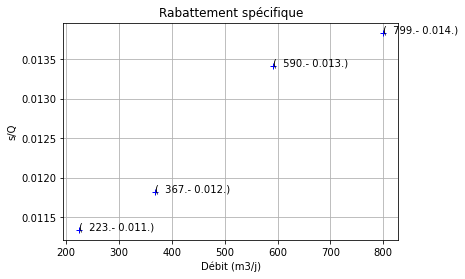

In [11]:
#creation de la courbe expérimentale sQ = f(Q)
print("Essai par paliers - Données")
print("Palier Débit (m3/j) Rabattement s (m) Rab. spé. s/q")
for i in range(len(debit)):
    #print(debit[i])
    print('{:9.3f}'.format(i+1), '{:9.3f}'.format(debit[i]), '{:9.3f}'.format(s[i]),'{:.3e}'.format(s_q[i]))
    
plt.title('Rabattement spécifique')
plt.xlabel('Débit (m3/j)')
plt.ylabel('s/Q')
plt.grid()

plt.plot(debit, s_q, '+b')
for xy in zip(debit, s_q):                                     
    plt.annotate('(%5.f.- %5.3f.)' % xy, xy=xy, textcoords='data')

#### 1.c Calculer la courbe caractéristique de l'ouvrage et détailler les parts relatives des pertes de charge liées à l'aquifère et à l'ouvrage

In [17]:
#ajustement lineaire (polynome d'ordre 1=regression lineaire)
m, b = np.polyfit(debit,s_q, 1)

#m = slope, b=intercept
print('pente = ', m)
print('ordonnée origine = ', b)


pente =  4.6816168158852755e-06
ordonnée origine =  0.010284542312761474


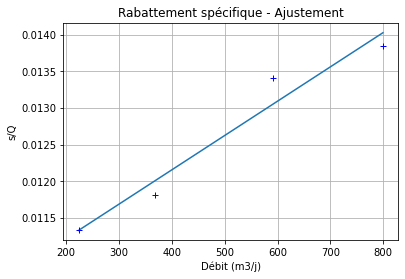

In [18]:
# paramétrage de la figure 
plt.title('Rabattement spécifique - Ajustement')
plt.xlabel('Débit (m3/j)')
plt.ylabel('s/Q')
plt.grid()

plt.plot(debit, m * debit + b) 
plt.plot(debit, s_q, '+b') 
plt.show()
#print(m * debit + b)

In [16]:
#ecriture de l'equation caracteristique du puits s = f(Q)
print('Equation caracteristique du puits:  ''s =','{:.2e}'.format(m),'Q^2 + ','{:.2e}'.format(b),'Q')

Equation caracteristique du puits:  s = 4.68e-06 Q^2 +  1.03e-02 Q


### 2 Exploitation et gestion - Proposer le graphique d'exploitation de l'ouvrage

#### 2.a Courbe caractéristique de l'ouvrage

La courbe caractéristique de l'ouvrage est un outil de gestion pratique pour l'exploitation courante du puits. Elle est utile pour construire la fiche technique de l'ouvrage.
On reporte généralement les informations suivantes:
- niveau statique
- courbe caractéristique de l'ouvrage
- profondeur des équipements importants de l'ouvrage (pompe, crépine, etc...)
- évolution du niveau d'eau dans l'ouvrage en fonction du débit d'exploitation

Le repérage peut être fait en profondeur, en côte NG, etc ...

Dans notre exemple, les informations sont les suivantes:
- niveau statique: -4.70 m/repère;
- haut des crépines: -16 m/repère
- chambre de la pompe: -14.50 m/repère


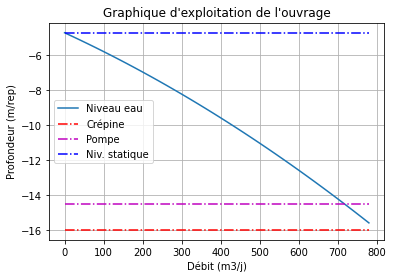

In [29]:
Q = np.arange(0, 800, 20)
sQ = Q *Q *m +  Q * b
prof = -4.70 + -sQ #m /rep  compte negativement pour montrer la direction

crepine = np.ones(len(Q)) * -16
pompe = np.ones(len(Q)) * -14.5
stat = np.ones(len(Q)) * -4.70

plt.title("Graphique d'exploitation de l'ouvrage")
plt.xlabel('Débit (m3/j)')
plt.ylabel('Profondeur (m/rep)')
plt.grid()

plt.plot(Q, prof, label='Niveau eau')
plt.plot(Q, crepine, '-.r',label='Crépine')
plt.plot(Q, pompe, '-.m', label='Pompe')
plt.plot(Q, stat, '-.b', label='Niv. statique')
plt.legend(loc='best')

plt.show()

#### 2.b Détermination d'un débit d'exploitation de l'ouvrage sous contrainte

Le débit d'exploitation du puits peut être contraint par des éléments techniques qui se traduisent par des contraintes associées à la coupe technique de l'ouvrage et à la profondeur de l'eau lors de l'exploitation. Pratiquement, le niveau de l'eau en pompage ne doit être plus bas:
- que la cellule d'aspiration de la pompe (risque de faire tourner la pompe à vide et de "cramer" le moteur
- que la côte de top des crépines (risque de dénoyage partiel de l'aquifère et de dégradation physico-chimique et bactériologique de ce dernier)
- ...

L'équation caractéristique de l'ouvrage est utilisée pour déterminer le débit limite correspondant à une côte critique ou un rabattement maximum associé à une limite technique.

En se fixant la valeur limite pour le rabattement, on peut écrire l'équation caractéristique:
$$
s_{lim} = C Q^2 + B Q 
$$

soit sous la forme mieux connue pour la résolution d'une équation à 1 inconnue du second ordre:

$$
C Q^2 + BQ - s_{lim} = 0
$$

On peut appliquer la procédure de résolution classique (calcul du déterminant puis choix de la solution plausible si plusieurs solutions) et ainsi obtenir le débit $Q_{lim}$ associé au rabattement limite $s_lim$

In [19]:
print("Résolution de l'équation CQ² + BQ = s_lim")
print("Méthode standard - Calcul du déterminant")

from math import *


a = float(input("Choisissez la valeur du coefficient quadratique C :"))
b = float(input("Choisissez la valeur du coefficient linéaire B :"))
c = float(input("Choisissez la valeur du rabattement limite s_lim (negatif) :"))
x = str

def eq2(a, b, c):
    print("L'équation à résoudre pour le débit limite est : {}Q² + {}Q + {}.".format(a, b, c))
    d = (b ** 2) - (4 * a * c)
    print("Le discriminant est de",d)
    if d < 0:
        print("Il n y a pas de solution.")
    elif d == 0:
        print("Il y a une solution :")
        n = (- b) / (2 * a)
        print ("x =",n)
    else:
        print("Il y a deux solutions mais une seule plausible d'un point de vue physique (débit positif):")
        n = (- b - sqrt(d)) / (2 * a)
        z = (- b + sqrt(d)) / (2 * a)
        print ("x1 =",n)
        print ("x2 =",z)
eq2(a, b, c)

# caracteristique du puits:  s = s = 4.68e-06 Q^2 +  1.03e-02 Q

Résolution de l'équation CQ² + BQ = s_lim
Méthode standard - Calcul du déterminant


Choisissez la valeur du coefficient quadratique C : 4.68e-6
Choisissez la valeur du coefficient linéaire B : 1.03e-2
Choisissez la valeur du rabattement limite s_lim (negatif) : -10


L'équation à résoudre pour le débit limite est : 4.68e-06Q² + 0.0103Q + -10.0.
Le discriminant est de 0.00029329
Il y a deux solutions mais une seule plausible d'un point de vue physique (débit positif):
x1 = -2930.097400004786
x2 = 729.2426991500851


### 3. Vieillissement d'un puits d'exploitation
 
Considérant dans les conditions de vieillissement classiques au bout de 25 ans une augmentation de 50\% des pertes de charge liées au puits, quel sera l'impact sur le rendement de l'ouvrage et son équipement?